# Inference for numerical data

## North Carolina births

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

## Exploratory analysis

Load the `nc` data set into our notebook.

In [174]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
# if this does not fix the issue, run this command instead.
#import os, ssl
#if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
#    getattr(ssl, '_create_unverified_context', None)): 
#    ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd

nc = pd.read_csv('https://www.openintro.org/stat/data/nc.csv')

We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

<div class = 'exercise'>
<h4>Exercise 1</h4>
What are the cases in this data set? How many cases are there in our sample?
</div>

In [175]:
#using shape function to see the number of records and columns
nc.shape

(1000, 13)

We have 1000 observations in the dataset, and each one represents a baby birth.

As a first step in the analysis, we should consider summaries of the data. This can be done using the `describe()` and `info()`:

In [176]:
nc.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


In [177]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
fage              829 non-null float64
mage              1000 non-null int64
mature            1000 non-null object
weeks             998 non-null float64
premie            998 non-null object
visits            991 non-null float64
marital           999 non-null object
gained            973 non-null float64
weight            1000 non-null float64
lowbirthweight    1000 non-null object
gender            1000 non-null object
habit             999 non-null object
whitemom          998 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 101.6+ KB


As you review the variable summaries, consider which variables are categorical and which are numerical. For numerical variables, are there outliers? If you aren't sure or want to take a closer look at the data, make a graph.

Consider the possible relationship between a mother's smoking habit and the weight of her baby. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

In [178]:
#showing first 5 rows
nc.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


Numerical variables are the ones displayed when using the describe function above, which are: fage, mage, weeks, visits, gained and weight. <br>
Below there are boxplots for each one of them to see if there are outliers.

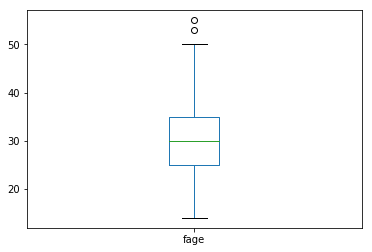

In [180]:
nc["fage"].plot(kind='box');

There are 2 outliers above the value 50 for fage.

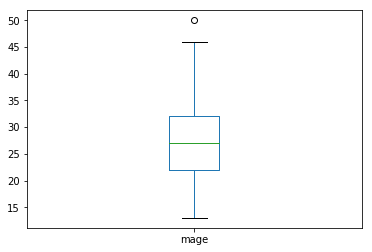

In [181]:
nc["mage"].plot(kind='box');

There is one outlier around the value 50 for mage.

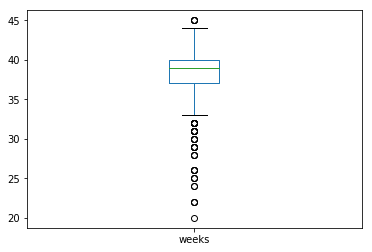

In [182]:
nc["weeks"].plot(kind='box');

There are several outliers for weeks between 20 and 30.

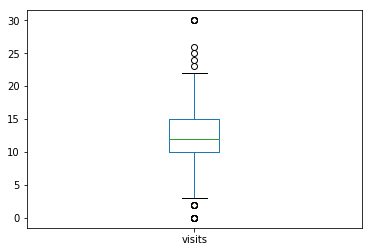

In [183]:
nc["visits"].plot(kind='box');

There are few outliers at both sides of the boxplot for visits.

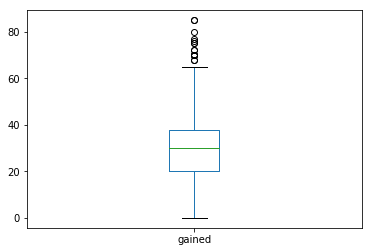

In [184]:
nc["gained"].plot(kind='box');

Gained attribute has a fair anumber of outliers above the value 60.

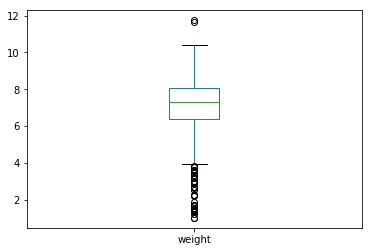

In [185]:
nc["weight"].plot(kind='box');

There is a high number of outliers for weight below the value 4.

<div class = 'exercise'>
<h4>Exercise 2</h4>
    Make a side-by-side boxplot of <code>habit</code> and <code>weight</code>. What does the plot highlight about the relationship between these two variables?
</div>

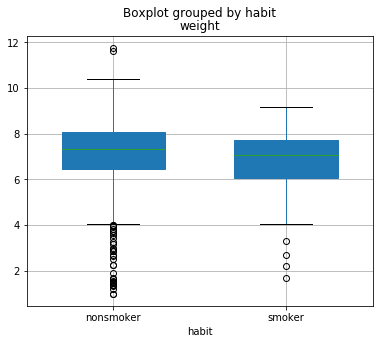

In [186]:
nc.boxplot(column='weight', by='habit', widths = 0.6,patch_artist = True,figsize=(6,5));

The boxplots show there is a big number of outliers for nonsmoker mothers, meaning that there is a higher number of baby with weight lower than 4 on nonsmoker mothers than in smoker's. Also there are outliers in the upper side of the boxplot for nonsmoker.

The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following function to split the `weight` variable into the `habit` groups, then take the mean of each using `mean()`.

In [187]:
nc.groupby(['habit'])['weight'].mean()

habit
nonsmoker    7.144273
smoker       6.828730
Name: weight, dtype: float64

There is an observed difference, but is this difference statistically significant? In order to answer this question we will conduct a hypothesis test .

## Inference

<div class = "exercise">
<h4>Exercise 3</h4>
Check if the conditions necessary for inference are satisfied. Note that you will need to obtain sample sizes to check the conditions. You can compute the group size using the same <code>groupby</code> command above but replacing <code>mean</code> with <code>size</code>.
</div>

In [188]:
# getting sample sizes.
nc.groupby(['habit'])['weight'].size()

habit
nonsmoker    873
smoker       126
Name: weight, dtype: int64

Chequing the conditions necessary for inference:
- The sample size is greater than 30 for both groups and wwere randomly taken.
- The number of samples is less than 10% of the entire population.
- Both distributions are nearly normal, the big size of the sample allows to have a little skew in the data.

<div class = "exercise">
<h4>Exercise 4</h4>
Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.
</div>

__Ho:__ There is no difference in the average weigths of babies born to smoking and non-smoking mothers. <br>
__Ha:__ There is some difference in the average weigths of babies born to smoking and non-smoking mothers. 

We will now conduct hypothesis tests for testing if the average weights of babies born to smoking and non-smoking mothers are different. For this task, we can use [`statsmodels`](https://www.statsmodels.org/stable/index.html), a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [189]:
import statsmodels.stats.weightstats as st

nc_weightANDsmoker = nc[nc['habit'] == 'smoker']['weight']
nc_weightANDnonsmoker = nc[nc['habit'] == 'nonsmoker']['weight']

dsw1 = st.DescrStatsW(nc_weightANDsmoker)
dsw2 = st.DescrStatsW(nc_weightANDnonsmoker)
cm = st.CompareMeans(dsw1, dsw2)

# calculate number of observations, mean and standard deviation for each group
n_smoker = dsw1.nobs
n_nonsmoker = dsw2.nobs
mean_smoker = dsw1.mean
mean_nonsmoker = dsw2.mean
sd_smoker = dsw1.std
sd_nonsmoker = dsw2.std
print(f'n_smoker = {n_smoker}')
print(f'mean_smoker = {mean_smoker}')
print(f'sd_smoker = {sd_smoker}')
print()
print(f'n_nonsmoker = {n_nonsmoker}')
print(f'mean_nonsmoker = {mean_nonsmoker}')
print(f'sd_nonsmoker = {sd_nonsmoker}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_smoker = 126.0
mean_smoker = 6.828730158730159
sd_smoker = 1.380668106117173

n_nonsmoker = 873.0
mean_nonsmoker = 7.144272623138601
sd_nonsmoker = 1.5178105512705897

Standard error = 0.13376049190705977
Test statistic: Z = -2.3590109449334946
p-value = 0.018323715325166526
reject null hypothesis


The p-value is lower than 0.05 so we reject the null hyphotesis.

<div class = 'exercise'>
<h4>Exercise 5</h4>
Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.</div>

In [190]:
#get the difference between both means
difference=mean_nonsmoker - mean_smoker

In [192]:
#get the upper and lower side, using 1.96 for 95% confidence
lower_side_interval=difference-(1.96*se)
upper_side_interval=difference+(1.96*se)

In [193]:
#print calculated interval, rounding to 4 decimals
print(f'confidence interval for the difference = ({round(lower_side_interval,4)}, {round(upper_side_interval,4)})')

confidence interval for the difference = (0.0534, 0.5777)


---
## On Your Own

__1)__ Calculate a 95% confidence interval for the average length of pregnancies (<code>weeks</code>) and interpret it in context. Note that since you're doing inference on a single population parameter, there is no explanatory variable, so you can omit the <code>x</code> variable from the function.

In [194]:
#chequing if there are NaN records
nc['weeks'].isnull().sum()

2

In [195]:
#getting weeks column in a variable
weeks_column=nc['weeks'].copy()

In [196]:
#droping NaN values
weeks_column.dropna(inplace=True, how ='any')

In [197]:
#showing new size
weeks_column.size

998

In [198]:
# excluding records with NaN values to calculate the mean
mean_weeks = weeks_column.mean()
mean_weeks

38.33466933867736

In [199]:
from scipy.stats import sem
#getting standard error
se=sem(weeks_column)
se

0.09279668581378588

In [200]:
#95% confidence interval
lower_side_interval=mean_weeks-(1.96*se)
upper_side_interval=mean_weeks+(1.96*se)

#print calculated interval, rounding to 4 decimals
print(f'95% confidence interval for weeks = ({round(lower_side_interval,4)}, {round(upper_side_interval,4)})')

95% confidence interval for weeks = (38.1528, 38.5166)


__2)__ Calculate a new confidence interval for the same parameter at the 90% confidence level.

In [201]:
#90% confidence interval
lower_side_interval=mean_weeks-(1.64*se)
upper_side_interval=mean_weeks+(1.64*se)

#print calculated interval, rounding to 4 decimals
print(f'90% confidence interval for weeks = ({round(lower_side_interval,4)}, {round(upper_side_interval,4)})')

90% confidence interval for weeks = (38.1825, 38.4869)


__3)__ Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

In [202]:
# getting sample sizes.
nc.groupby(['mature']).size()

mature
mature mom     133
younger mom    867
dtype: int64

__Ho:__ There is no difference in the average weigths gained by younger mothers and mature mothers. <br>
__Ha:__ There is some difference in the average weigths gained by younger mothers and mature mothers. 

In [203]:
#using same code as exercise 4
nc_weightANDmature = nc[nc['mature'] == 'mature mom']['gained']
nc_weightANDnonmature = nc[nc['mature'] == 'younger mom']['gained']

#excluding NaN rows
nc_weightANDmature.dropna(inplace=True, how ='any')
nc_weightANDnonmature.dropna(inplace=True, how ='any')

#rest of the code
dsw1 = st.DescrStatsW(nc_weightANDmature)
dsw2 = st.DescrStatsW(nc_weightANDnonmature)
cm = st.CompareMeans(dsw1, dsw2)

# calculate number of observations, mean and standard deviation for each group
n_mature = dsw1.nobs
n_nonmature = dsw2.nobs
mean_mature = dsw1.mean
mean_nonmature = dsw2.mean
sd_mature = dsw1.std
sd_nonmature = dsw2.std
print(f'n_mature = {n_mature}')
print(f'mean_mature = {mean_mature}')
print(f'sd_mature = {sd_mature}')
print()
print(f'n_nonmature = {n_nonmature}')
print(f'mean_nonmature = {mean_nonmature}')
print(f'sd_nonmature = {sd_nonmature}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_mature = 129.0
mean_mature = 28.790697674418606
sd_mature = 13.430079867583979

n_nonmature = 844.0
mean_nonmature = 30.56042654028436
sd_nonmature = 14.33840822856442

Standard error = 1.2856891093446254
Test statistic: Z = -1.376482738325338
p-value = 0.16867222789392544
accept null hypothesis


The p-value is higher than 0.05 showing that we should not reject the null hyphotesis. There is not enough evidence to say that there is a difference between the average weight gained by younger mothers and the average weight gained by mature mothers.

__4)__ Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.

In [204]:
#getting the corresponding ages for mature and young mom
nc_ageANDmature = nc[nc['mature'] == 'mature mom']['mage']
nc_ageANDnonmature = nc[nc['mature'] == 'younger mom']['mage']

#excluding NaN rows
nc_ageANDmature.dropna(inplace=True, how ='any')
nc_ageANDnonmature.dropna(inplace=True, how ='any')

To understand the cuoff I will get the minimun value for the mature mom and the maximun value for the younger mom

In [205]:
min(nc_ageANDmature)

35

In [206]:
max(nc_ageANDnonmature)

34

The results show that 35 years is the cutoff for a mother to start being considered mature in the dataset. So all mom that are 35 or older are considered mature.

__5)__ Pick a pair of numerical and categorical variables and come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. Answer your question with Python, report the statistical results, and also provide an explanation in plain language.

- Conduct a hypothesis test evaluating whether the average father's age of premature babies is different than the average father's age of full-term babies.

__Ho:__ There is no difference in the average father's age by premature and full-term babies. <br>
__Ha:__ There is some difference in the average father's age by premature and full-term babies. 

In [207]:
#using same code as exercise 4
nc_fageANDpremie = nc[nc['premie'] == 'premie']['fage']
nc_fageANDnonpremie = nc[nc['premie'] == 'full term']['fage']

#excluding NaN rows
nc_fageANDpremie.dropna(inplace=True, how ='any')
nc_fageANDnonpremie.dropna(inplace=True, how ='any')

#rest of the code
dsw1 = st.DescrStatsW(nc_fageANDpremie)
dsw2 = st.DescrStatsW(nc_fageANDnonpremie)
cm = st.CompareMeans(dsw1, dsw2)

# calculate number of observations, mean and standard deviation for each group
n_premie = dsw1.nobs
n_nonpremie = dsw2.nobs
mean_premie = dsw1.mean
mean_nonpremie = dsw2.mean
sd_premie = dsw1.std
sd_nonpremie = dsw2.std
print(f'n_premie = {n_premie}')
print(f'mean_premie = {mean_premie}')
print(f'sd_premie = {sd_premie}')
print()
print(f'n_nonpremie = {n_nonpremie}')
print(f'mean_nonpremie = {mean_nonpremie}')
print(f'sd_nonpremie = {sd_nonpremie}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_premie = 114.0
mean_premie = 30.31578947368421
sd_premie = 7.55252460343581

n_nonpremie = 714.0
mean_nonpremie = 30.242296918767508
sd_nonpremie = 6.628294607365859

Standard error = 0.7525976593029412
Test statistic: Z = 0.09765185156803438
p-value = 0.9222087496252132
accept null hypothesis


The p-value is higher than 0.05 showing that we should not reject the null hyphotesis. There is not enough evidence to say that there is a difference between the average father's age of premature babies and the average father's age of full-term borns.

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com